# 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
fifa2019 = pd.read_csv('fifa2019.csv')

In [3]:
print(fifa2019.shape)

(18207, 89)


In [4]:
print(fifa2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# 데이터 다루기

In [5]:
# 특정 선수의 데이터 검색하기
sub1 = fifa2019.loc[14]
print(sub1)

Unnamed: 0                                                    14
ID                                                        215914
Name                                                    N. Kanté
Age                                                           27
Photo             https://cdn.sofifa.org/players/4/19/215914.png
                                       ...                      
GKHandling                                                  12.0
GKKicking                                                   10.0
GKPositioning                                                7.0
GKReflexes                                                  10.0
Release Clause                                           €121.3M
Name: 14, Length: 89, dtype: object


In [6]:
# 원하는 범위의 데이터 검색하기
sub2 = fifa2019.loc[2:16]
print(sub2)

    Unnamed: 0      ID            Name  Age  \
2            2  190871       Neymar Jr   26   
3            3  193080          De Gea   27   
4            4  192985    K. De Bruyne   27   
5            5  183277       E. Hazard   27   
6            6  177003       L. Modrić   32   
7            7  176580       L. Suárez   31   
8            8  155862    Sergio Ramos   32   
9            9  200389        J. Oblak   25   
10          10  188545  R. Lewandowski   29   
11          11  182521        T. Kroos   28   
12          12  182493        D. Godín   32   
13          13  168542     David Silva   32   
14          14  215914        N. Kanté   27   
15          15  211110       P. Dybala   24   
16          16  202126         H. Kane   24   

                                             Photo Nationality  \
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.pn

In [7]:
# 전체 선수들의 이름과 선호하는 발 정보 출력하기
sub3 = fifa2019.loc[:, ['Name','Preferred Foot']]
print(sub3)

                     Name Preferred Foot
0                L. Messi           Left
1       Cristiano Ronaldo          Right
2               Neymar Jr          Right
3                  De Gea          Right
4            K. De Bruyne          Right
...                   ...            ...
18202        J. Lundstram          Right
18203  N. Christoffersson          Right
18204           B. Worman          Right
18205      D. Walker-Rice          Right
18206           G. Nugent          Right

[18207 rows x 2 columns]


In [8]:
# 여러 행의 데이터 중 원하는 열 값만 골라 출력하기
sub4 = fifa2019.iloc[0:10, 1:3]
print(sub4)

       ID               Name
0  158023           L. Messi
1   20801  Cristiano Ronaldo
2  190871          Neymar Jr
3  193080             De Gea
4  192985       K. De Bruyne
5  183277          E. Hazard
6  177003          L. Modrić
7  176580          L. Suárez
8  155862       Sergio Ramos
9  200389           J. Oblak


In [9]:
# 우리나라 선수들 출력하기
korea_player = fifa2019['Nationality'] == 'Korea Republic'
sub5 = fifa2019.loc[korea_player]

In [11]:
print(sub5)

       Unnamed: 0      ID             Name  Age  \
125           125  200104           H. Son   25   
1295         1295  180283    Ki Sung Yueng   29   
1407         1407  182152     Koo Ja Cheol   29   
2002         2002  211927  Kwon Chang Hoon   24   
2021         2021  221671     Lee Jae Sung   25   
...           ...     ...              ...  ...   
17955       17955  240272   Min Gyeong Min   22   
17959       17959  245401     Lee Dong Hee   21   
17965       17965  243359     Kim Jong Jin   19   
18058       18058  244108  Hong Hyeon Seok   19   
18084       18084  244411      Kwon Ki Pyo   21   

                                                Photo     Nationality  \
125    https://cdn.sofifa.org/players/4/19/200104.png  Korea Republic   
1295   https://cdn.sofifa.org/players/4/19/180283.png  Korea Republic   
1407   https://cdn.sofifa.org/players/4/19/182152.png  Korea Republic   
2002   https://cdn.sofifa.org/players/4/19/211927.png  Korea Republic   
2021   https://cdn.sof

# 데이터 시각화하기

In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:>

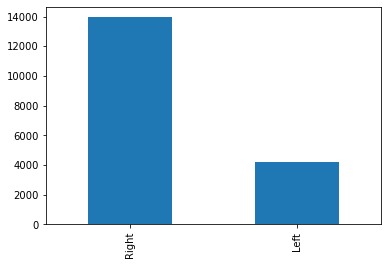

In [13]:
fifa2019['Preferred Foot'].value_counts().plot(kind='bar')

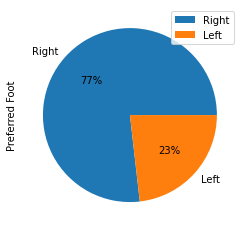

In [19]:
fifa2019['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.f%%')
plt.legend()
plt.show()

# K-평균 군집화 알고리즘을 바탕으로 체력, 드리블 능력 데이터를 상,중,하 3개의 팀으로 나눠보기

In [21]:
import pandas as pd
fifa2019 = pd.read_csv('fifa2019.csv')

In [23]:
# 데이터를 불러온 뒤, 전반적인 능력치(Overall)로 정렬
df = pd.DataFrame.copy(fifa2019.sort_values(by='Overall', ascending=False).head(200))

# 선수마다 가진 특성 중에 우리가 필요한 정보인 이름, 체력, 드리블, 짧은 패스, 패널티킥 특성만 test_features라는 변수에 저장
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']

# df에 test_features라는 특성을 열로 하는 새로운 데이터프레임을 만들어 준다.
test_df = pd.DataFrame(df, columns=test_features)

print(test_df.head(5))

                Name  Stamina  Dribbling  ShortPassing  Penalties
0           L. Messi     72.0       97.0          90.0       75.0
1  Cristiano Ronaldo     88.0       88.0          81.0       85.0
2          Neymar Jr     81.0       96.0          84.0       81.0
3             De Gea     43.0       18.0          50.0       40.0
4       K. De Bruyne     90.0       86.0          92.0       79.0


In [27]:
# 학습 데이터 준비하기

import numpy as np
XY = np.array(test_df)
X = XY[:, 1:3]

In [28]:
# K - 평균 군집화 알고리즘 적용하기

# 표본 공간에서 사용할 중심을 생성하기
k = 3
C_x = np.random.choice(X[:, 0], k)
C_y = np.random.choice(X[:, 1], k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[88. 80.]
 [78. 90.]
 [60. 84.]]


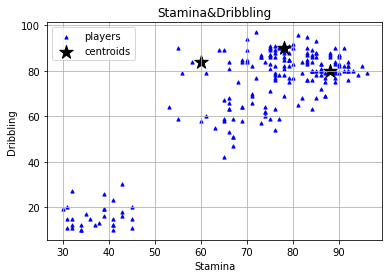

In [31]:
# 생성 결과를 시각적으로 표현?? 

import matplotlib.pyplot as plt
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']
plt.title('Stamina&Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')
plt.scatter(Stamina, Dribbling, marker='^', c='blue', s=10, label='players')
plt.scatter(C_x, C_y, marker='*', c='black', s=200, label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()

In [32]:
# 각 표본에 가까운 중심에 할당하기

## 먼저 거리를 추측하는 함수를 만들어보자.

def Distance(A,B):
    return np.sqrt(np.sum(np.power((A-B),2)))

In [36]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = Distance(C, C_old)
print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
197.44366285095097


In [38]:
# 각 군집의 중심을 새롭게 계산하기

from copy import deepcopy

distances = []
while flag != 0:
    for i in range(len(X)):
        for j in range(3):
            temp = Distance(X[i], C[j])
            distances.append(temp)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []
        
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
                                      
    flag = Distance(C, C_old)

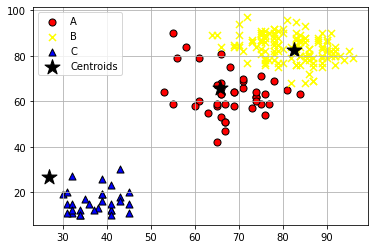

In [43]:
# 문제 해결하기
import matplotlib.pyplot as plt

plt.scatter(X[clusters == 0 , 0], X[clusters == 0, 1], s=50, c='red', marker='o', edgecolor='black', label='A')
plt.scatter(X[clusters == 1 , 0], X[clusters == 1, 1], s=50, c='yellow', marker='x', edgecolor='black', label='B')
plt.scatter(X[clusters == 2 , 0], X[clusters == 2, 1], s=50, c='blue', marker='^', edgecolor='black', label='C')

plt.scatter(C[:, 0], C[:, 1], s=250, marker='*', c='black', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()